<a href="https://colab.research.google.com/github/douglasbarbosadelima/Data-Science/blob/master/transfer1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Transfer Learning..parte 1, retirando a última camada e verificando o output das features...

In [1]:
!pip install tensorflow-gpu==2.0.0 

     |████████████████████████████████| 380.8MB 44kB/s 
     |████████████████████████████████| 3.8MB 46.6MB/s 
     |████████████████████████████████| 450kB 57.8MB/s 
ERROR: tensorflow 1.15.0 has requirement tensorboard<1.16.0,>=1.15.0, but you'll have tensorboard 2.0.2 which is incompatible.
ERROR: tensorflow 1.15.0 has requirement tensorflow-estimator==1.15.1, but you'll have tensorflow-estimator 2.0.1 which is incompatible.
  Found existing installation: tensorboard 1.15.0
    Uninstalling tensorboard-1.15.0:
      Successfully uninstalled tensorboard-1.15.0
  Found existing installation: tensorflow-estimator 1.15.1
    Uninstalling tensorflow-estimator-1.15.1:
      Successfully uninstalled tensorflow-estimator-1.15.1


In [2]:
import tensorflow as tf
import numpy as np
tf.__version__

'2.0.0'

In [0]:
from keras.datasets import mnist
#download mnist data and split into train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

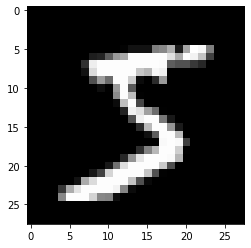

In [25]:
import matplotlib.pyplot as plt
#plot the first image in the dataset
plt.gray()
plt.imshow(X_train[0])

In [26]:
#check image shape
X_train[0].shape

(28, 28)

In [0]:
#reshape data to fit model
X_train = X_train.reshape(60000,28,28,1)
X_test = X_test.reshape(10000,28,28,1)

In [28]:
from keras.utils import to_categorical
#one-hot encode target column
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [0]:
#create model
model = tf.keras.Sequential()
#add model layers
model.add(tf.keras.layers.Convolution2D(64,kernel_size=3, activation='relu', input_shape=(28,28,1)))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2)))
model.add(tf.keras.layers.Convolution2D(32,kernel_size=3, activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2)))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [30]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 11, 11, 32)        18464     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 800)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                8010      
Total params: 27,114
Trainable params: 27,114
Non-trainable params: 0
__________________________________________________

In [0]:
#compile model using accuracy to measure model performance
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [32]:
#train the model
hist=model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 8s 129us/sample - loss: 0.3154 - accuracy: 0.9352 - val_loss: 0.0887 - val_accuracy: 0.9746
Epoch 2/10
60000/60000 [==============================] - 7s 118us/sample - loss: 0.0832 - accuracy: 0.9751 - val_loss: 0.0877 - val_accuracy: 0.9717
Epoch 3/10
60000/60000 [==============================] - 7s 118us/sample - loss: 0.0630 - accuracy: 0.9807 - val_loss: 0.0633 - val_accuracy: 0.9812
Epoch 4/10
60000/60000 [==============================] - 7s 116us/sample - loss: 0.0526 - accuracy: 0.9830 - val_loss: 0.0648 - val_accuracy: 0.9823
Epoch 5/10
60000/60000 [==============================] - 7s 117us/sample - loss: 0.0458 - accuracy: 0.9855 - val_loss: 0.0671 - val_accuracy: 0.9842
Epoch 6/10
60000/60000 [==============================] - 7s 116us/sample - loss: 0.0413 - accuracy: 0.9878 - val_loss: 0.0612 - val_accuracy: 0.9837
Epoch 7/10
60000/60000 [==========================

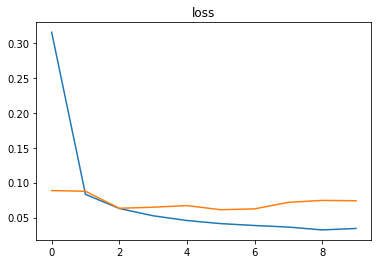

In [33]:
import matplotlib.pyplot as plt
plt.title('loss')
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.show()

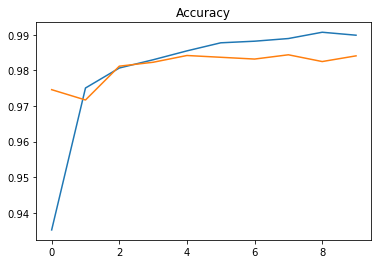

In [34]:
plt.title('Accuracy')
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.show()


Teste com amostra fabricada

In [50]:
img=plt.imread('x2.png')
img=255*img[:,:,0]
img=img.reshape((28,28,1))
model.predict_classes(np.array( [img] ))

array([4])

In [0]:
b1 = img.copy()

In [0]:
b2 = img.copy()

In [0]:
x1 = img.copy()

In [0]:
x2 = img.copy()

In [53]:
model1 = tf.keras.Sequential()#novo modelo que é copiado
for layer in model.layers[:-1]:#menos a última camada (output)
  model1.add(layer)
model1.summary()


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 11, 11, 32)        18464     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 800)               0         
Total params: 19,104
Trainable params: 19,104
Non-trainable params: 0
_________________________________________________________________


In [0]:
#obter as fetures de img que vieram das convoluções
vb1 = model1.predict(np.array([b1]))
vb2 = model1.predict(np.array([b2]))
vx1 = model1.predict(np.array([x1]))
vx2 = model1.predict(np.array([x2]))


In [56]:
np.linalg.norm(vb1-vx1), np.linalg.norm(vb1-vb2), np.linalg.norm(vx1-vx2)

(92.4021, 80.1546, 55.52977)

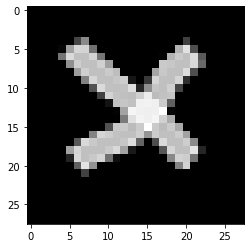

In [65]:
b1 = b1.reshape((28, 28))
x1 = x1.reshape((28, 28))
b2 = b2.reshape((28, 28))
x2 = x2.reshape((28, 28))

plt.imshow(x1)

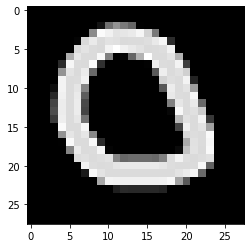

In [64]:
plt.imshow(b1)

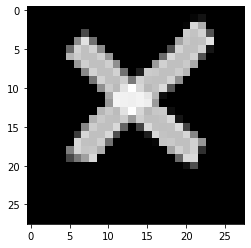

In [66]:
plt.imshow(x2)

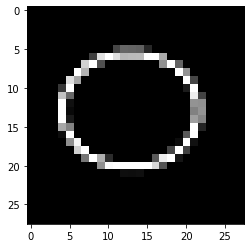

In [67]:
plt.imshow(b2)